## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [1]:
! pip install kagglehub

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_34792\1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#  **SET DEFUALT STYLE FOR ALL CHARTS**


In [4]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

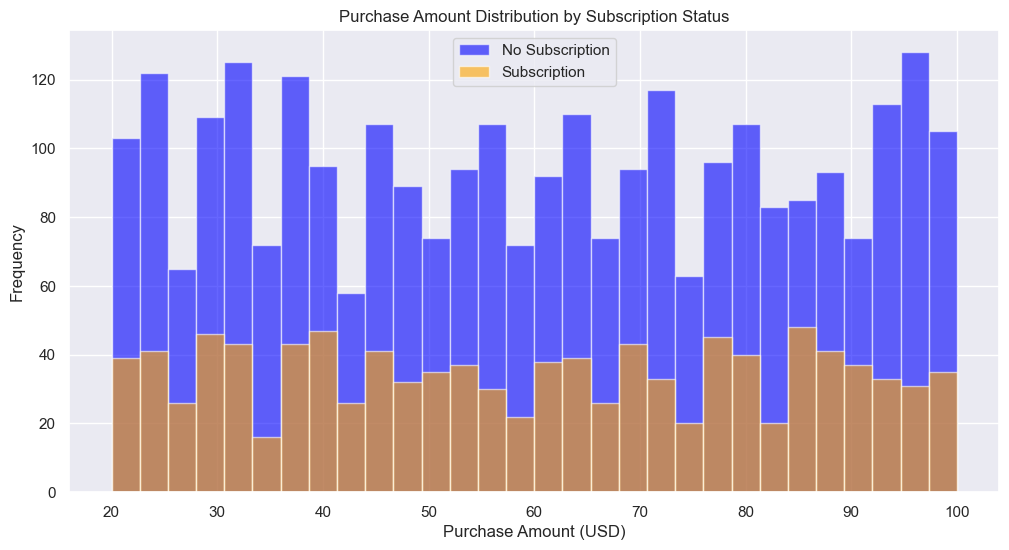

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(df[df['Subscription Status'] == "No"]['Purchase Amount (USD)'], bins=30, color='blue', alpha=0.6)
plt.hist(df[df['Subscription Status'] == "Yes"]['Purchase Amount (USD)'], bins=30,  color='orange', alpha=0.6)
plt.title('Purchase Amount Distribution by Subscription Status')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.legend(['No Subscription', 'Subscription'])
plt.show()

# The number of unsubscribers is much more than the number of subscribers

C:\Users\user\AppData\Local\Temp\ipykernel_34792\2159188294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Purchase Amount (USD)",data=df,x="Subscription Status",palette="Set2")


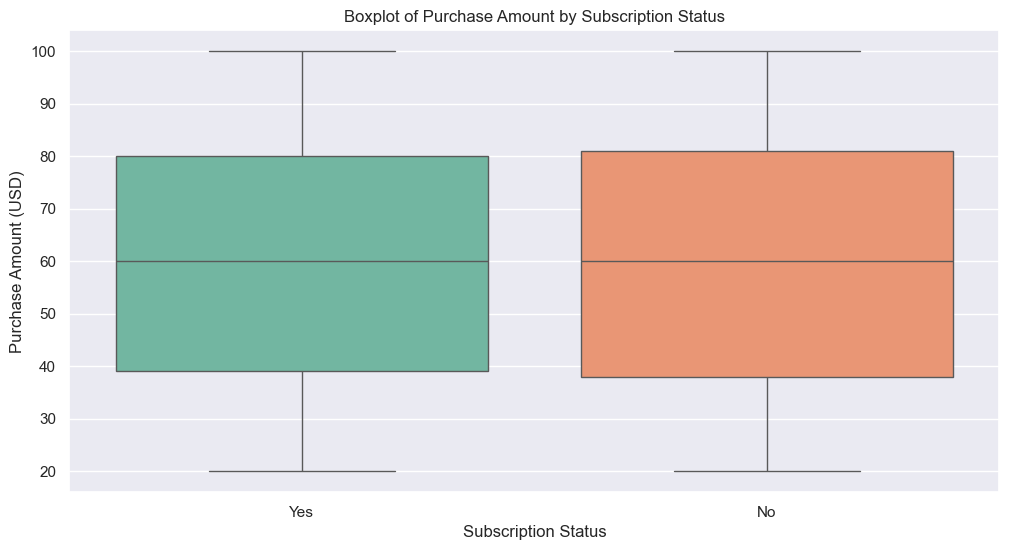

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(y="Purchase Amount (USD)",data=df,x="Subscription Status",palette="Set2")
plt.title('Boxplot of Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# There are no outliers and the average buying in the two cases appears to be almost equal.

In [7]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

C:\Users\user\AppData\Local\Temp\ipykernel_34792\2247834855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=df, palette='Set2', order=order_counts)


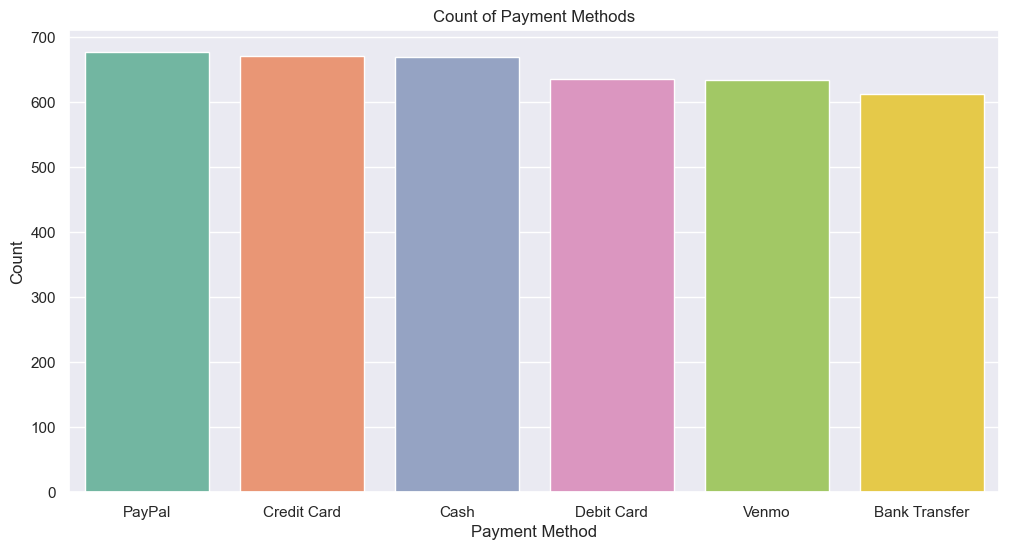

In [8]:
order_counts = df['Payment Method'].value_counts().index
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment Method', data=df, palette='Set2', order=order_counts)
plt.title('Count of Payment Methods')
plt.xlabel('Payment Method')    
plt.ylabel('Count')
plt.show()

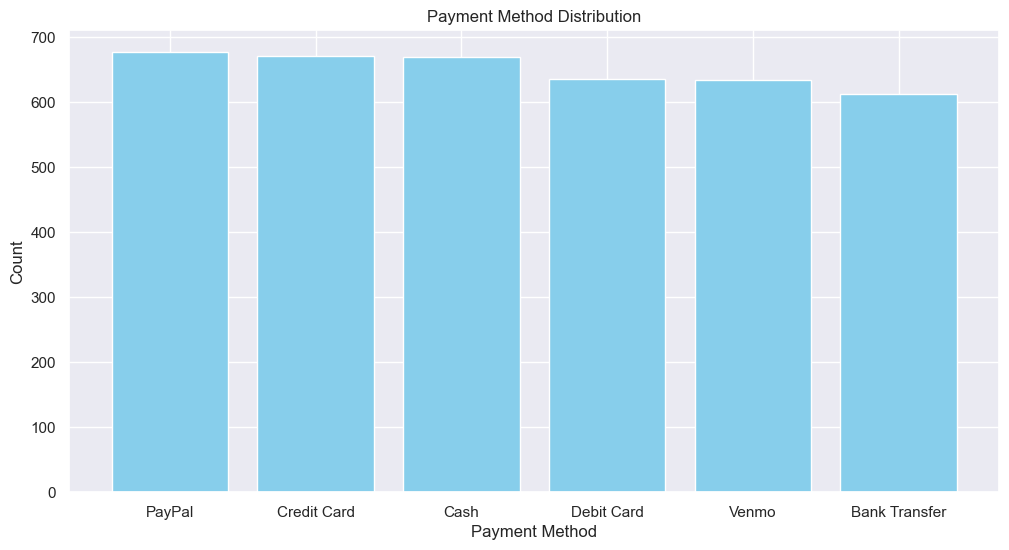

In [9]:
index = df['Payment Method'].value_counts().index
values = df['Payment Method'].value_counts().values
plt.figure(figsize=(12, 6))
plt.bar(index, values, color='skyblue')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# PayPal It has the largest percentage of use among people.

In [10]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

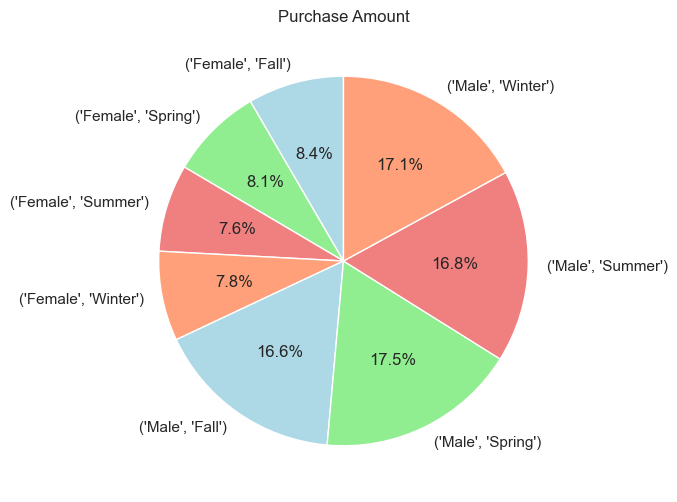

In [11]:
plt.figure(figsize=(14, 6))
x=df.groupby(['Gender','Season'])['Purchase Amount (USD)'].count()
plt.pie(x, labels=x.index, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'], startangle=90,autopct='%1.1f%%')
plt.title('Purchase Amount')
plt.show()

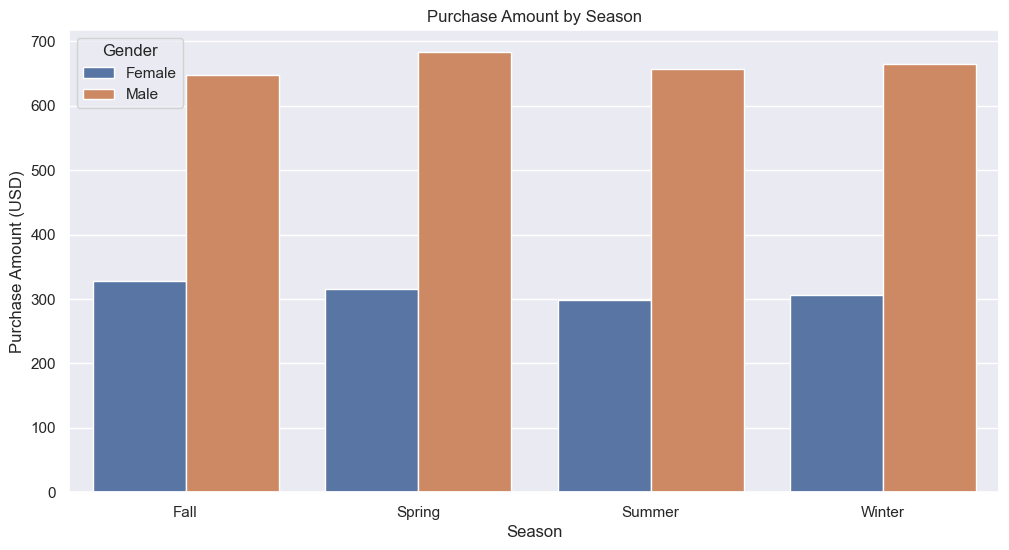

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)',hue='Gender', data=x.reset_index())
plt.title('Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Males category with spring They are the majority group

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

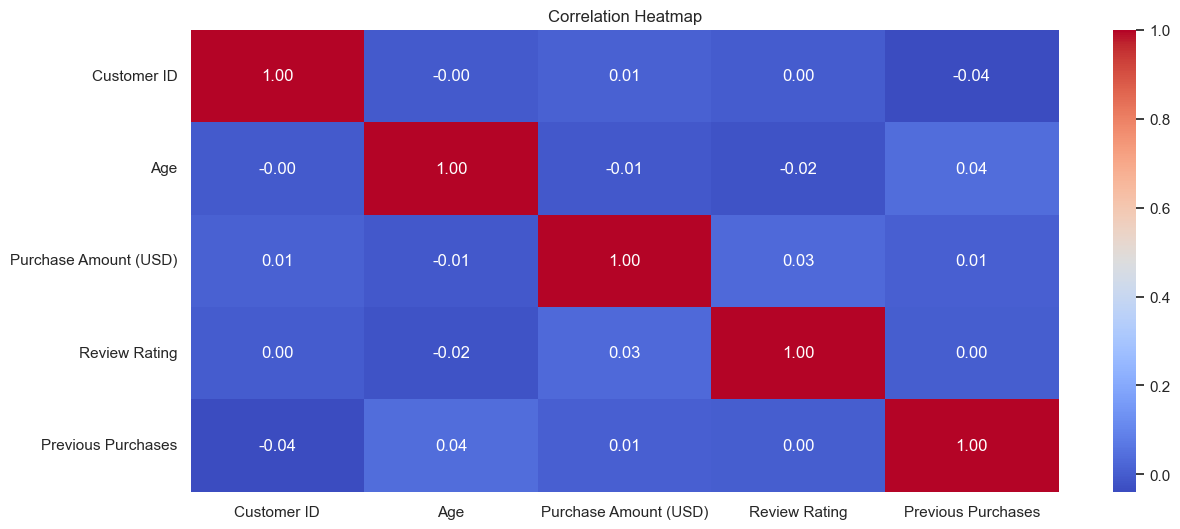

In [13]:
plt.figure(figsize=(14, 6))
num_col= df.select_dtypes(include='number').columns
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

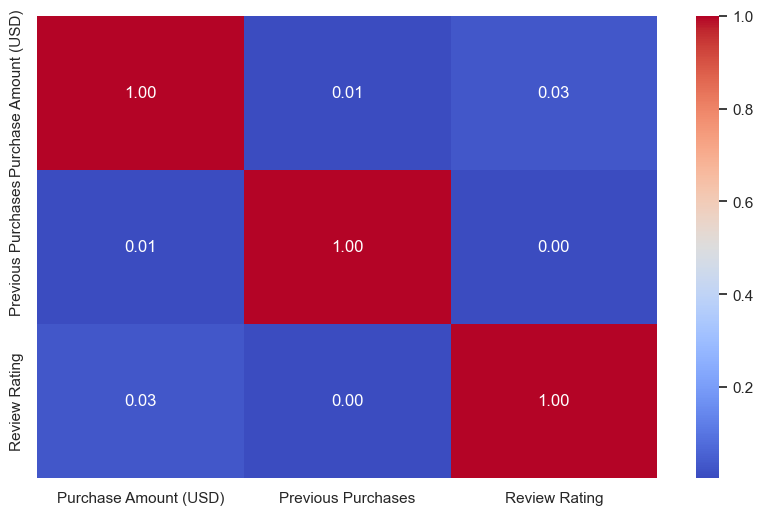

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_col][['Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')

# There is no strong correlation between Previous Purchases, Purchase Amount, and Review Rating, as all correlation values are close to zero

In [15]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

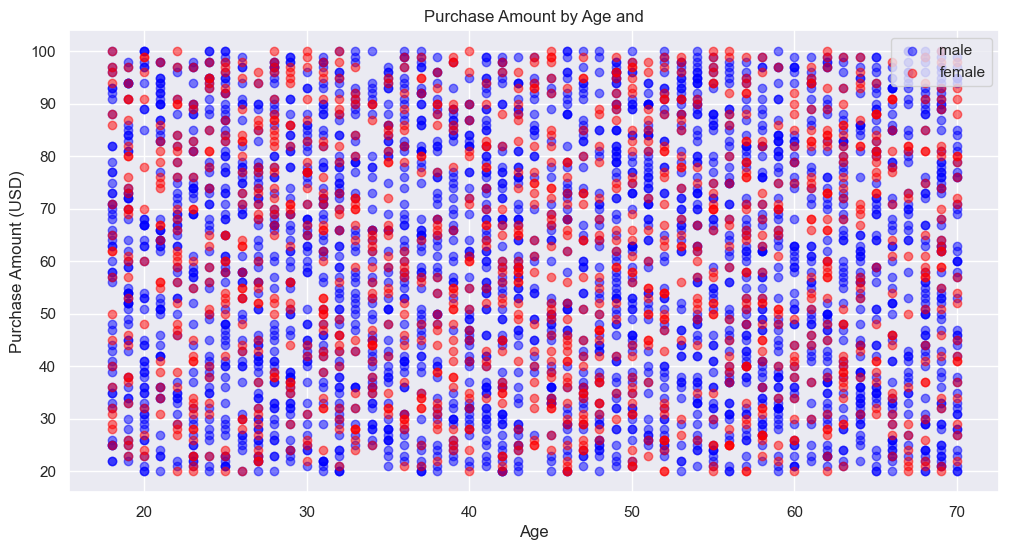

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(df[df['Gender']=="Male"]['Age'],df[df['Gender']=="Male"]['Purchase Amount (USD)'], alpha=0.5, color='blue',label="male")
plt.scatter(df[df['Gender']=="Female"]['Age'],df[df['Gender']=="Female"]['Purchase Amount (USD)'], alpha=0.5, color='red',label="female")
plt.title('Purchase Amount by Age and')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)') 
plt.legend(loc='upper right')
plt.show()

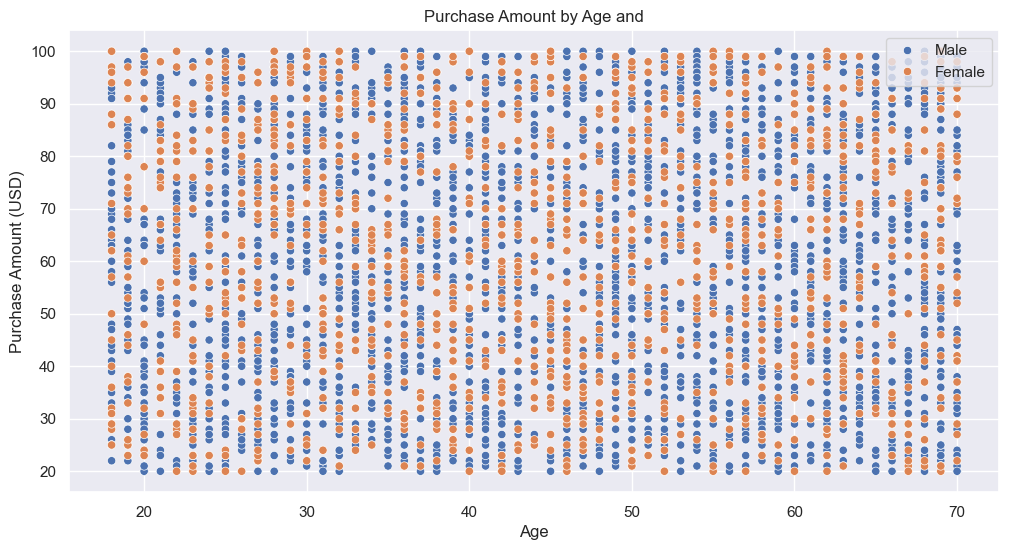

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=df)
plt.title('Purchase Amount by Age and')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(loc='upper right')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34792\3242728515.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


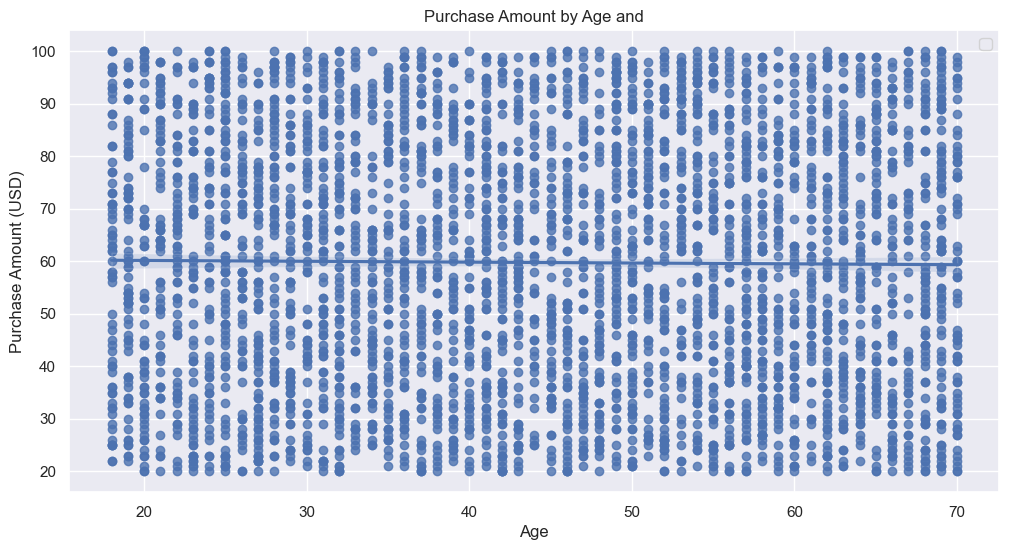

In [18]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Age', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Age and')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(loc='upper right')
plt.show()


 # From the previous 3 distributions, it appears that there is no clear difference between females and males of different ages in Purchase Amount the horizontal line between variables.

In [19]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

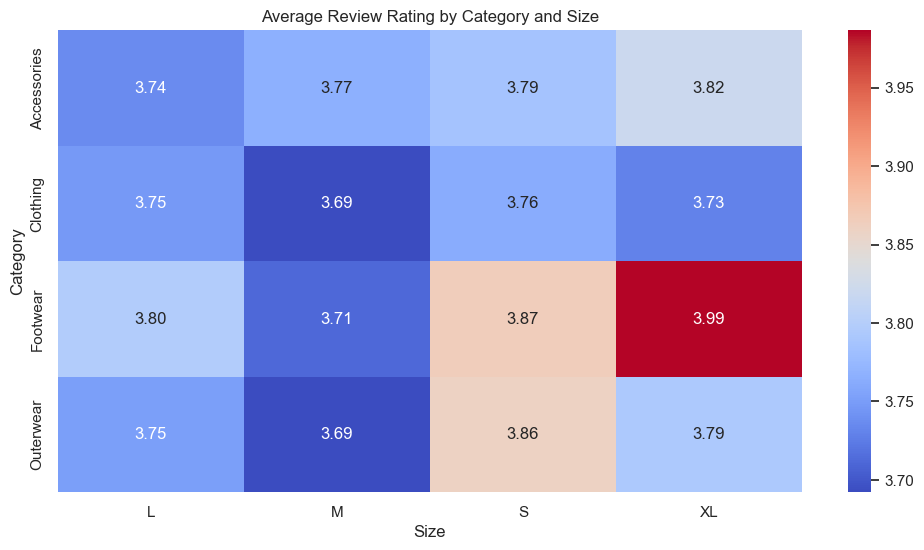

In [20]:
pivot_table = df.pivot_table(index='Category', columns='Size',values='Review Rating', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Review Rating by Category and Size')
plt.show()


#  xl footweat popular with peapol

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

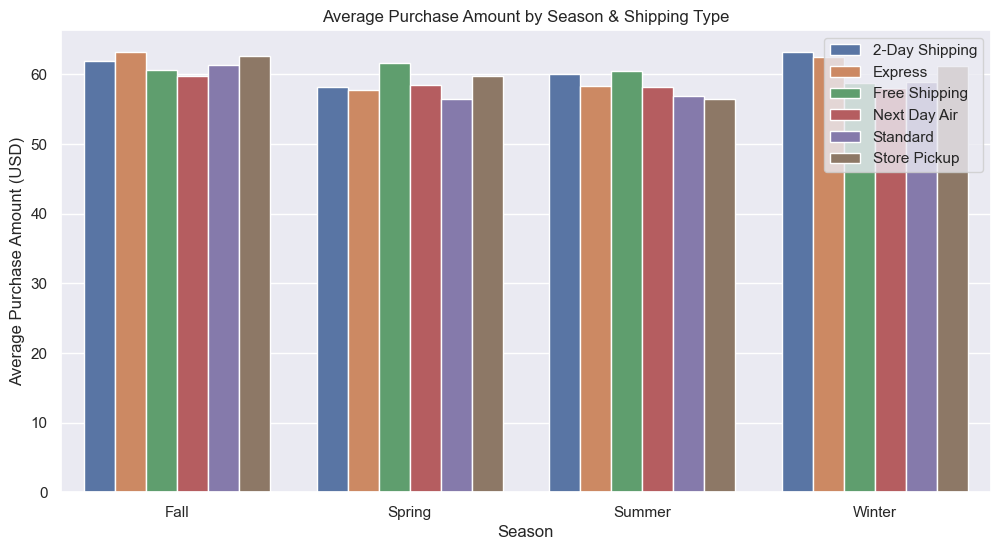

In [21]:
grouped_data = df.groupby(['Season', 'Shipping Type'])['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Season', y='Purchase Amount (USD)', hue='Shipping Type')
plt.title('Average Purchase Amount by Season & Shipping Type')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(loc='upper right')
plt.show()

# Average purchase amounts are consistent across seasons, with minor differences between shipping types

<Figure size 1200x600 with 0 Axes>

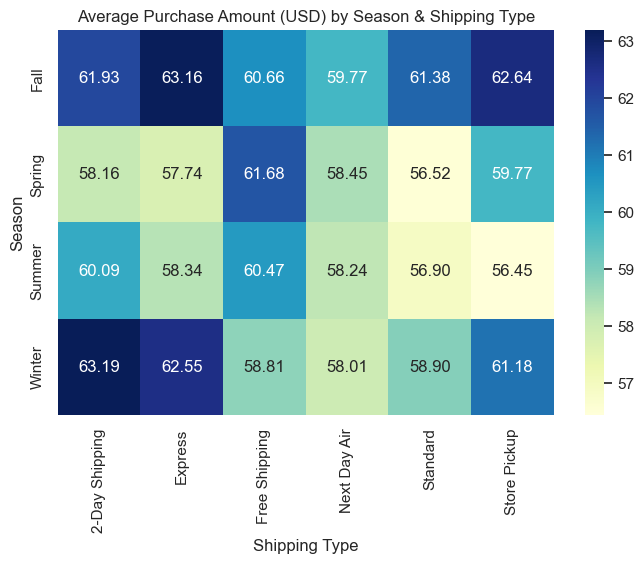

In [22]:
plt.figure(figsize=(12, 6))
pivot_table = df.pivot_table(index='Season', columns='Shipping Type', values='Purchase Amount (USD)', aggfunc='mean')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Purchase Amount (USD) by Season & Shipping Type')
plt.ylabel('Season')
plt.xlabel('Shipping Type')
plt.show()

# Fall and Winter generally have the highest average purchase amounts, while Spring tends to have the lowest across shipping types.

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

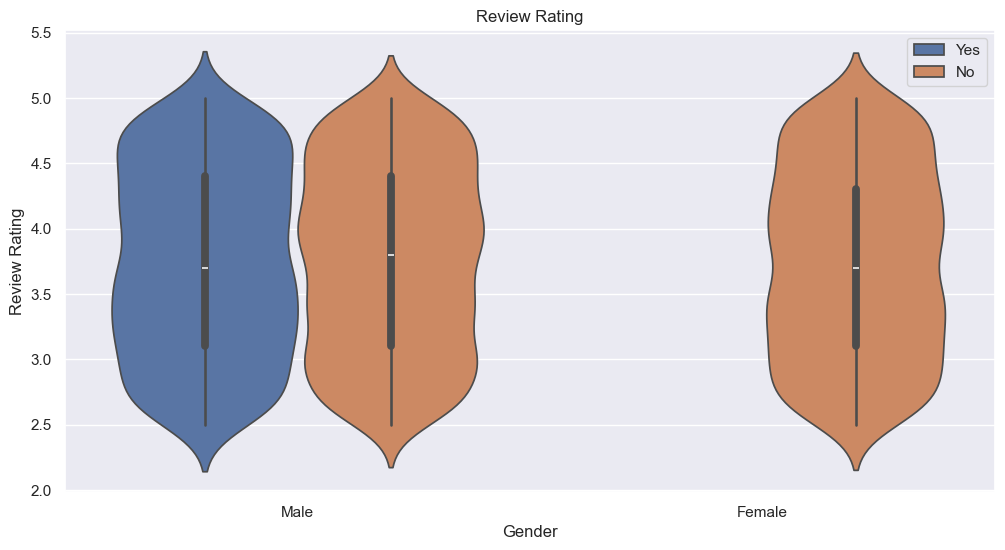

In [23]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Review Rating', hue='Subscription Status', data=df)
plt.title('Review Rating')
plt.xlabel('Gender')
plt.ylabel('Review Rating')
plt.legend(loc='upper right')

# The violin plot shows that both Yes and No subscription groups have a median review rating around 4.0-4.5,  all Female are not subscribers

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

Text(0, 0.5, 'Total Purchase Amount (USD)')

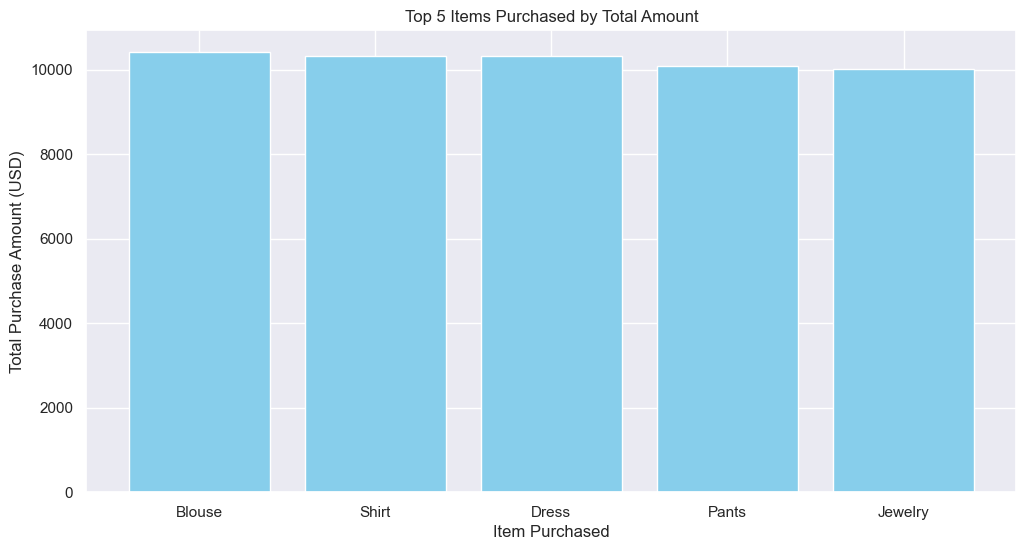

In [24]:
top_5=df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(5).reset_index()
plt.figure(figsize=(12, 6))
plt.bar(top_5['Item Purchased'], top_5['Purchase Amount (USD)'], color='skyblue')
plt.title('Top 5 Items Purchased by Total Amount')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')

Text(0.5, 0, 'Item Purchased')

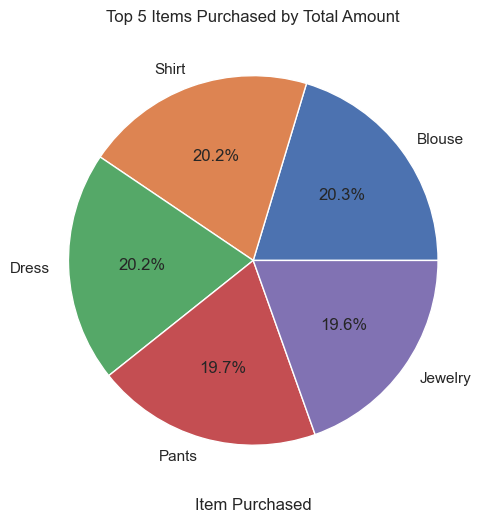

In [25]:
plt.figure(figsize=(12, 6))
plt.pie(top_5['Purchase Amount (USD)'], labels=top_5['Item Purchased'], autopct='%1.1f%%')
plt.title('Top 5 Items Purchased by Total Amount')
plt.xlabel('Item Purchased')

# It seems that the blouse is the most purchased type, but there are other similar types as well.

In [32]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

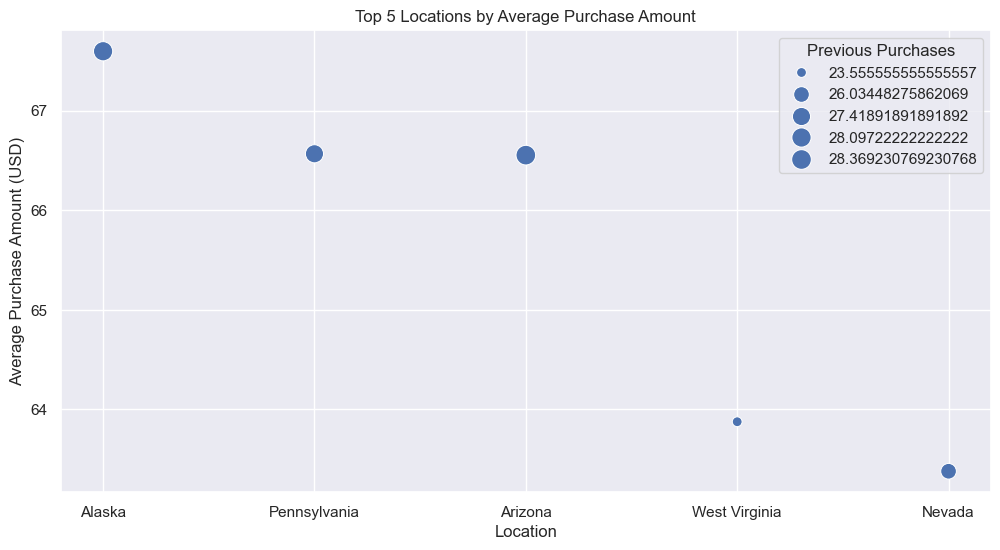

In [33]:
top_5 = df.groupby('Location')[['Purchase Amount (USD)', 'Previous Purchases']].mean().sort_values('Purchase Amount (USD)', ascending=False).head(5).reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Location', y='Purchase Amount (USD)', data=top_5, size='Previous Purchases', sizes=(50, 200))
plt.title('Top 5 Locations by Average Purchase Amount')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

# Alaska has the highest buying rate and West Virginia has the lowest buying rate and previous buying rates.

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

Text(0.5, 33.249999999999986, 'Size')

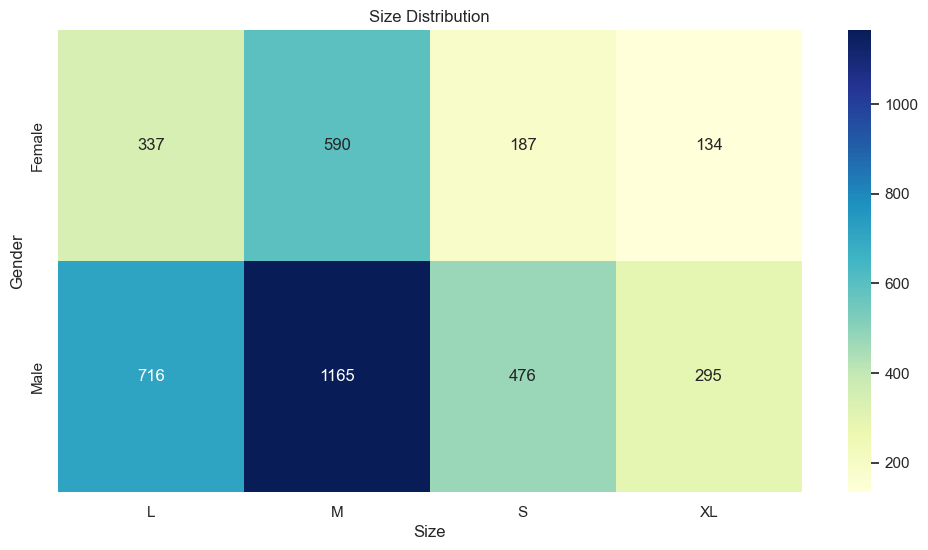

In [27]:
crosstab=pd.crosstab(df['Gender'], df['Size'])
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Size Distribution')
plt.xlabel('Size')


# Males appear to be mostly large to medium in size.

In [28]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

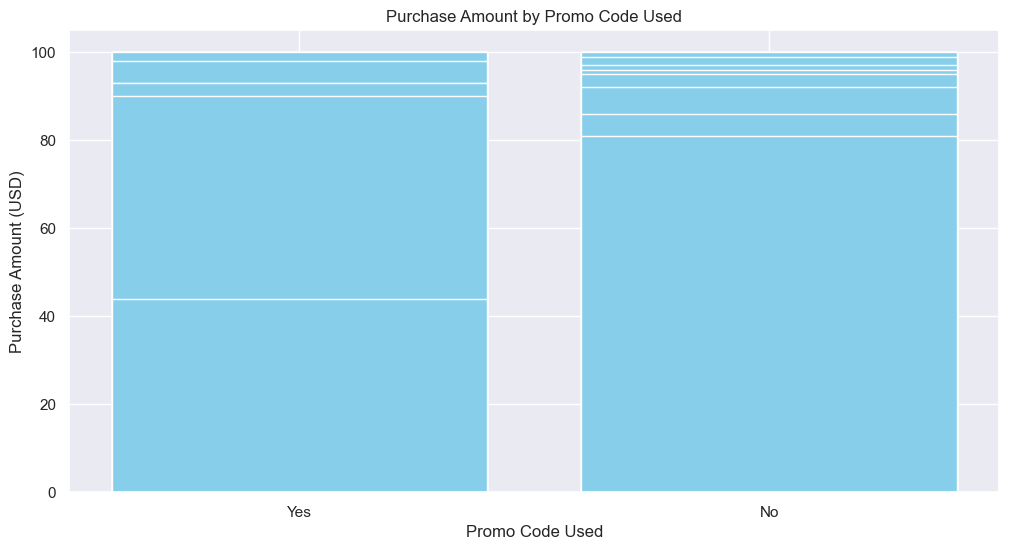

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(df['Promo Code Used'],df['Purchase Amount (USD)'], color='skyblue')
plt.title('Purchase Amount by Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34792\640155036.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo Code Used', data=df, palette='Set2')


Text(0.5, 1.0, 'Count of Promo Codes Used')

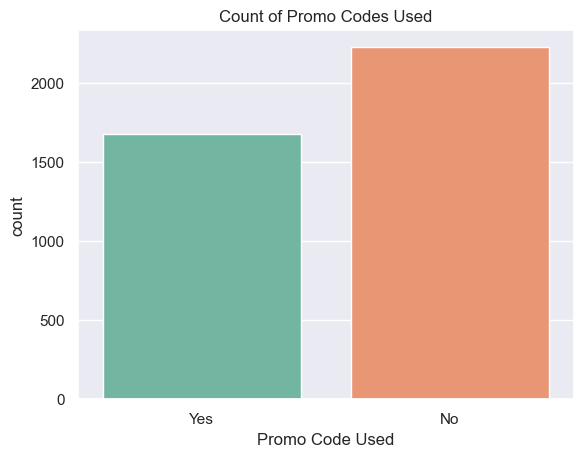

In [30]:
sns.countplot(x='Promo Code Used', data=df, palette='Set2')
plt.title('Count of Promo Codes Used')



# From the two figures, the number of people who do not use the code is greater, but in the payment process they are considered almost equal.

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

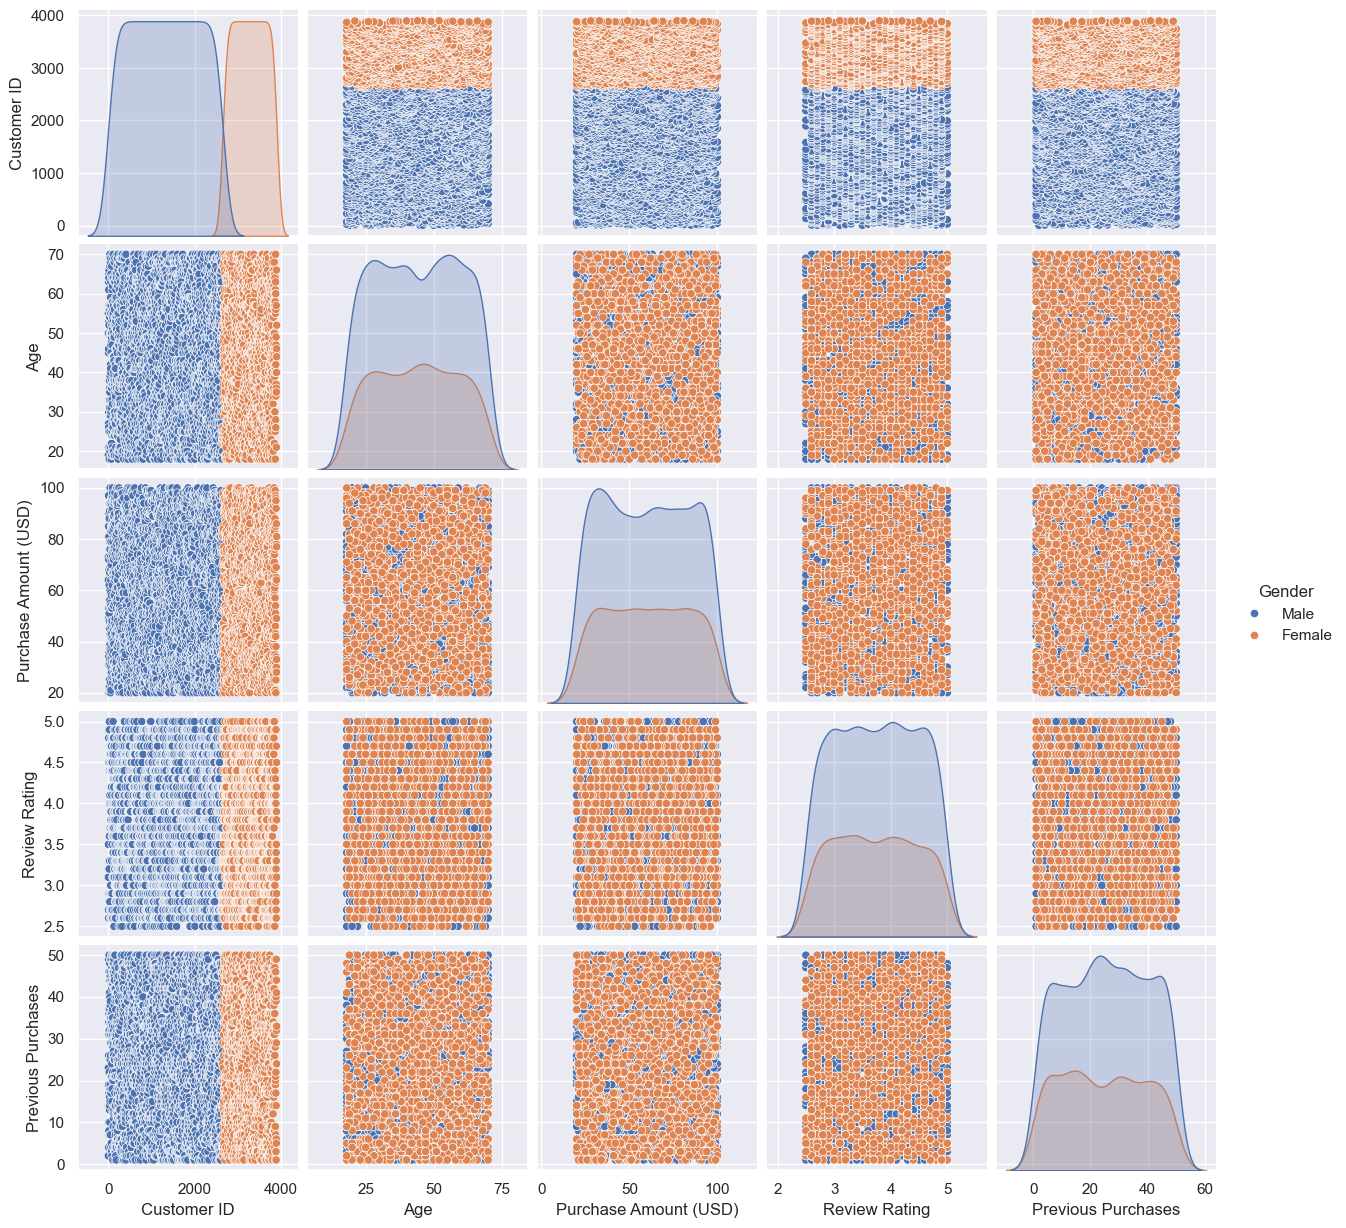

In [41]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

sns.pairplot(df[numeric_cols.tolist() + ["Gender"]], hue="Gender", diag_kind="kde")